<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-1">Libraries Used</a></span></li><li><span><a href="#Specific-Aims" data-toc-modified-id="Specific-Aims-2">Specific Aims</a></span></li><li><span><a href="#Research" data-toc-modified-id="Research-3">Research</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-4">Methods</a></span><ul class="toc-item"><li><span><a href="#Structure-of-KLH" data-toc-modified-id="Structure-of-KLH-4.1">Structure of KLH</a></span><ul class="toc-item"><li><span><a href="#Load-Information" data-toc-modified-id="Load-Information-4.1.1">Load Information</a></span></li><li><span><a href="#Check-data-image" data-toc-modified-id="Check-data-image-4.1.2">Check data image</a></span></li><li><span><a href="#Information-about-4BED" data-toc-modified-id="Information-about-4BED-4.1.3">Information about 4BED</a></span></li><li><span><a href="#Atom-by-atom-distance-matrix" data-toc-modified-id="Atom-by-atom-distance-matrix-4.1.4">Atom by atom distance matrix</a></span></li><li><span><a href="#Alpha-distance-calculator-for-protein-dictionaries" data-toc-modified-id="Alpha-distance-calculator-for-protein-dictionaries-4.1.5">Alpha distance calculator for protein dictionaries</a></span></li><li><span><a href="#Protein-dictionary-distance-matrix" data-toc-modified-id="Protein-dictionary-distance-matrix-4.1.6">Protein dictionary distance matrix</a></span></li><li><span><a href="#Save-Distance-matrix-for-latter" data-toc-modified-id="Save-Distance-matrix-for-latter-4.1.7">Save Distance matrix for latter</a></span></li><li><span><a href="#Plot-Distance-Matrix" data-toc-modified-id="Plot-Distance-Matrix-4.1.8">Plot Distance Matrix</a></span></li><li><span><a href="#Different-methods-for-setting-distance-matrices." data-toc-modified-id="Different-methods-for-setting-distance-matrices.-4.1.9">Different methods for setting distance matrices.</a></span></li></ul></li></ul></li><li><span><a href="#Citations" data-toc-modified-id="Citations-5">Citations</a></span></li></ul></div>

# An Investigation of Keyhole Limpet Hemocyanin

<img src="images/klh.JPG"><br>

## Libraries Used

In [1]:
# Basic Libraries
from random import choices, randint
from collections import Counter, defaultdict
import re
from glob import glob
import itertools
import pickle
import json

# Data Science
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

# Calculate distance between strings
from Levenshtein import distance as l_dist

# Visulization Libraries
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Video, HTML
import pytraj as pt
import nglview as nv
from mpl_toolkits import mplot3d

# Biopython libraries
import Bio
from Bio import AlignIO, SeqIO, pairwise2, Phylo, Entrez
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio.PDB import *
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align.Applications import ClustalwCommandline

# Web Crawlers 
import requests
import subprocess
Entrez.email = "mcruggs@gmail.com"

# Multiprocessing 
import multiprocessing

In [2]:
import warnings

## Specific Aims

Hemocyanin is the copper-containing, main oxygen carrying protein commonly used in the blood of arthropods, mollusks, and some other invertebrates. Hemocyanin is of interest in biomedical research because of its use as an adjuvant in vaccine development. Unfortunately, current production of hemocyanin as an adjuvant is extremely expensive with the harvesting process requiring blood from the limpet Megathura crenulata. Key-Hole Limpet hemocyanin (KLH) is challenging to produce with recombinant techniques due to the large size of the protein. The cost of extraction ranges between five thousand to one hundred and fifty thousand dollars per gram of KLH. <br><br>
Due to the increased demand, vaccine adjuvants may present as a bottleneck for future vaccine development. Recombinant KLH that has been produced with E. coli, however, is not used for general medical practice due to unsuitable purity. While the structure of KLH has been resolved to 9Å Angstroms, with its functional unit resolved to 4Å, potential alternative hemocyanin sources to this protein have not been determined with imaging techniques such as Cryo-EM or X-ray crystallography.  <br><br>
The goal of this work will be two-fold.  First, this work aims to understand the significance of adjuvants in relation to KLH, exploring the properties of its medicinal use and tradeoffs to alternative adjuvants. Second, this work aims to explore the structure of KLH using computational and bioinformatic techniques in conjunction with analysis found in literature, highlighting potential alternatives to this important protein. 


## Research

## Methods

### Structure of KLH

Using ChimeraX the structure of KLH will be modeled. Subunits of the protein will be highlighted. Biochemistry of the amino acids will be considered and a distance matrix will be constructed. Copper chemistry and activity of the active sites will also be conducted. The focus will be on understanding the tertiary structure of each KLH subunit.

#### Load Information

In [3]:
warnings.filterwarnings('ignore')

pdb_code = "4BED"
pdb_filename = "data/4bed.pdb1"

key_hole = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
key_hole_atoms = [i for i in key_hole.get_atoms()]

First we check to see if the length of the 4BED protein is correct

In [4]:
len(key_hole_atoms)

552920

Next we create a dictionary of all of the different atoms, distances, etc

In [5]:
klh_atom_dictionary = {}
klh_location = []
for atom in key_hole_atoms:
    klh_atom_dictionary[atom.serial_number - 1] = {
        "atom_name": atom.name,
        "element": atom.element,
        "amino_group": atom.parent.resname,
        "amino_index": atom.parent.id[1] - 1,
        "sub_unit": atom.parent.parent.id,
        "np_coord": atom.coord,
        "coord": [atom.coord[0], atom.coord[1], atom.coord[2]]
    }
    # This is just too big to try and solve directly
    klh_location.append([atom.coord[0], atom.coord[1], atom.coord[2]])

In [6]:
x = [i[0] for i in klh_location]
y = [i[1] for i in klh_location]
z = [i[2] for i in klh_location]

#### Check data image

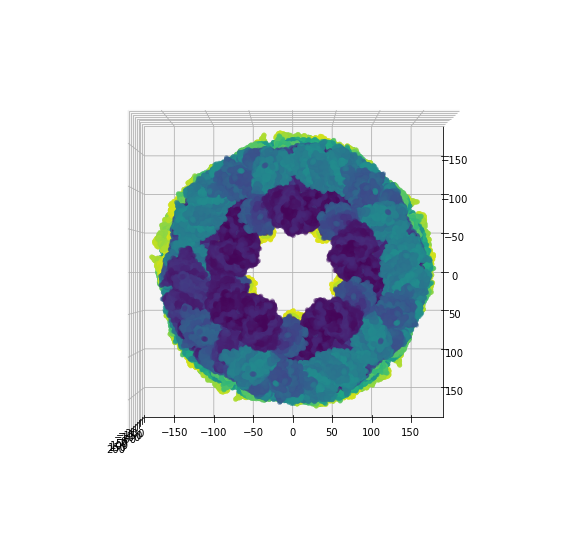

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.view_init(90, 0) 
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

#### Information about 4BED

Test find indices of copper atoms in KHL

In [8]:
copper_indices = []
for atom in klh_atom_dictionary:
    a = klh_atom_dictionary[atom]
    if a["element"] == "CU":
        copper_indices.append(atom)
        
print(copper_indices)

[55232, 55233, 55236, 55237, 55240, 55241, 55244, 55245, 55248, 55249, 55252, 55253, 55256, 55257, 55260, 55261, 55264, 55265, 55268, 55269, 55272, 55273, 55276, 55277, 55280, 55281, 55284, 55285, 55288, 55289, 55292, 55293]


In [9]:
klh_atom_dictionary[1]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 0,
 'sub_unit': 'A',
 'np_coord': array([  -1.432, -134.101, -170.128], dtype=float32),
 'coord': [-1.432, -134.101, -170.128]}

In [10]:
klh_atom_dictionary[55293]

{'atom_name': 'CU2',
 'element': 'CU',
 'amino_group': 'CUO',
 'amino_index': 9007,
 'sub_unit': 'D',
 'np_coord': array([  74.077,  -40.231, -160.703], dtype=float32),
 'coord': [74.077, -40.231, -160.703]}

#### Atom by atom distance matrix

Since there are so many atom in the total KLH, we will not be able to make a complete distance matrix for every matrix, however we can make a distance matrix for each subunit.

In [11]:
klh_alpha_carbons ={k:v for k,v in klh_atom_dictionary.items() 
                                if v["atom_name"] == "CA" or v["element"] == "CU"}

In [12]:
len(klh_alpha_carbons)

6828

#### Alpha distance calculator for protein dictionaries

In [13]:
# Modified from code at https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/protein_contact_map/
def calc_alpha_distance(r_1, r_2, p_dict):
    """Take key values from protein dict and calcualtes distance"""
    diff_vect = p_dict[r_1]["np_coord"] - p_dict[r_2]["np_coord"]
    return np.sqrt(np.sum(diff_vect * diff_vect))

In [14]:
klh_alpha_carbons[1]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 0,
 'sub_unit': 'A',
 'np_coord': array([  -1.432, -134.101, -170.128], dtype=float32),
 'coord': [-1.432, -134.101, -170.128]}

In [15]:
klh_alpha_carbons[109]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 13,
 'sub_unit': 'A',
 'np_coord': array([ -16.857, -128.752, -159.343], dtype=float32),
 'coord': [-16.857, -128.752, -159.343]}

In [16]:
calc_alpha_distance(1, 109, klh_alpha_carbons)

19.566776

In [17]:
[[i,j] for i,j in enumerate(klh_alpha_carbons.keys())][0:3]

[[0, 1], [1, 10], [2, 18]]

#### Protein dictionary distance matrix

In [18]:
# TODO add multiprocessing to this line
def calc_dist_matrix(p_dict):
    """Returns a numpy matrix for all key entries in a protein dictionary"""
    matrix = np.zeros((len(p_dict), len(p_dict)), np.float)
    for row, i in enumerate(p_dict.keys()):
        for column, j in enumerate(p_dict.keys()):
            matrix[row, column] = calc_alpha_distance(i, j, p_dict)
            if row % 500 == 0 and column == 0:
                print("Procesing row #{}".format(row))
            
    return matrix

In [19]:
alpha_distance_matrix = calc_dist_matrix(klh_alpha_carbons)

Procesing row #0
Procesing row #500
Procesing row #1000
Procesing row #1500
Procesing row #2000
Procesing row #2500
Procesing row #3000
Procesing row #3500
Procesing row #4000
Procesing row #4500
Procesing row #5000
Procesing row #5500
Procesing row #6000
Procesing row #6500


#### Save Distance matrix for latter

In [20]:
with open('data/distance_matrix.pickle', 'wb') as handle:
    pickle.dump(alpha_distance_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Plot Distance Matrix

In [21]:
alpha_distance_matrix[0:1]

array([[  0.        ,   3.75266671,   6.29493475, ..., 173.45292664,
        118.81137085, 120.83880615]])

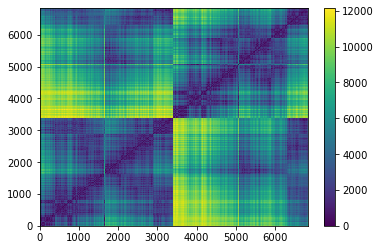

<Figure size 2000x2000 with 0 Axes>

In [22]:
N = len(alpha_distance_matrix)
dist_mat = squareform(pdist(alpha_distance_matrix))

plt.pcolormesh(np.transpose(dist_mat))
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.figure(figsize=(10,10), dpi = 200);
plt.show();

In [23]:
# I lifted this from a website, list the source later. 
# This is also screaming for multithreading will change code and add it
# later
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

#### Different methods for setting distance matrices.

I haven't seen anyone apply this type of analysis to any protein contact maps before, I am really excited about this idea, and I will update how it effects pytorch analysis.

Method:	 ward


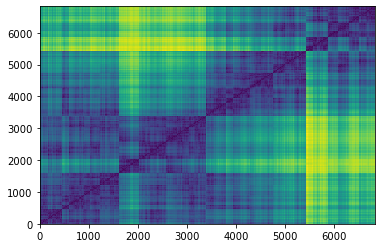

Method:	 single


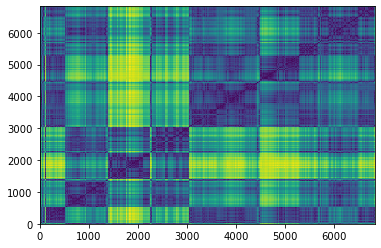

Method:	 average


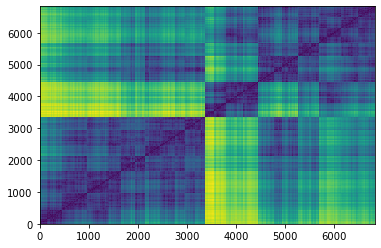

Method:	 complete


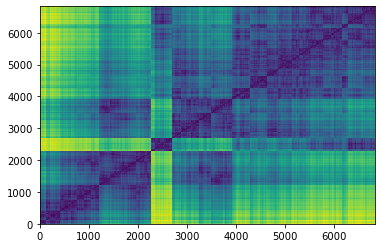

In [24]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

In [ ]:
# Experiment with new clustering options like
# from sklearn.cluster.bicluster import SpectralBiclustering
# model = SpectralBiclustering(n_clusters=4)
# model.fit(mat)
# sortedmat = mat.T[np.argsort(model.row_labels_)]
# sortedmat = fit_data[:, np.argsort(model.column_labels_)]

## Citations